# Analysis of the Coronawiki dataset

### Load the different files

In [18]:
import pandas as pd
import json
import gzip
 


path = 'data/'

#Load csv files
df_interventions = pd.read_csv(path + 'interventions.csv')
df_google_mobility = pd.read_csv(path + 'Global_Mobility_Report.csv.gz')
df_apple_mobility = pd.read_csv(path + 'applemobilitytrends-2020-04-20.csv')
df_topics_linked = pd.read_csv(path + 'topics_linked.csv.xz')

#Load the (gzipped) json file
with gzip.open(path + 'aggregated_timeseries.json.gz', "rb") as f:
    json_timeseries = json.loads(f.read().decode("ascii"))



C:\Users\meria\AppData\Local\Temp\ipykernel_13188\3222714998.py:11: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_google_mobility = pd.read_csv(path + 'Global_Mobility_Report.csv.gz')


## Study each dataframe

### Interventions dataframe

In [23]:
#Dataframe overview

print(df_interventions)

   lang    1st case   1st death School closure Public events banned  \
0    fr  2020-01-24  2020-02-14     2020-03-14           2020-03-13   
1    da  2020-02-27  2020-03-12     2020-03-13           2020-03-12   
2    de  2020-01-27  2020-03-09     2020-03-14           2020-03-22   
3    it  2020-01-31  2020-02-22     2020-03-05           2020-03-09   
4    nl  2020-02-27  2020-03-06     2020-03-11           2020-03-24   
5    no  2020-02-26  2020-02-26     2020-03-13           2020-03-12   
6    sr  2020-03-06  2020-03-20     2020-03-15           2020-03-21   
7    sv  2020-01-31  2020-03-11     2020-03-18           2020-03-12   
8    ko  2020-01-20  2020-02-20     2020-02-23                  NaN   
9    ca  2020-01-31  2020-02-13     2020-03-12           2020-03-08   
10   fi  2020-01-29  2020-03-21     2020-03-16           2020-03-16   
11   ja  2020-01-16  2020-02-13     2020-02-27           2020-02-25   
12   en         NaN         NaN            NaN                  NaN   

     

In [20]:
#Countries considered in this dataset

print (df_interventions.shape[0], 'countries considered :')

for ctry in df_interventions['lang'] :
    print (ctry, end='  ')

['ca', 'ca.m', 'da', 'da.m', 'de', 'de.m', 'en', 'en.m', 'fi', 'fi.m', 'fr', 'fr.m', 'it', 'it.m', 'ja', 'ja.m', 'ko', 'ko.m', 'nl', 'nl.m', 'no', 'no.m', 'sr', 'sr.m', 'sv', 'sv.m', 'tr', 'tr.m'

13 countries considered :
fr  da  de  it  nl  no  sr  sv  ko  ca  fi  ja  en  

### Apple mobility report

In [21]:
#Dataframe overview

df_apple_mobility.head(3)

,geo_type,region,transportation_type,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,...,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20
0,country/region,Albania,driving,100,95.30,101.43,97.20,103.55,112.67,104.83,...,25.47,24.89,32.64,31.43,30.67,30.00,29.26,22.94,24.55,31.51
1,country/region,Albania,walking,100,100.68,98.93,98.46,100.85,100.13,82.13,...,27.63,29.59,35.52,38.08,35.48,39.15,34.58,27.76,27.93,36.72
2,country/region,Argentina,driving,100,97.07,102.45,111.21,118.45,124.01,95.44,...,19.40,12.89,21.10,22.29,23.55,24.40,27.17,23.19,14.54,26.67


In [5]:
#Min and max dates of this dataset

apple_cols = df_apple_mobility.columns
print ('Reference day :', apple_cols[3])
print ('Last day :', apple_cols[-1])

Reference day : 2020-01-13
Last day : 2020-04-20


In [6]:
#Regions considered

#Number of cities and country/region considered
print (df_apple_mobility['geo_type'].value_counts(), '\n')

#Regions considered
apple_regions = df_apple_mobility[df_apple_mobility['geo_type']=='country/region']['region']
print ('Regions : \n', apple_regions.unique(), '\n')

#Count the regions where the data is for walking, driving and transit
occurence_counting = apple_regions.value_counts()
print('Nb of regions with data for walking, driving and transit :', occurence_counting[occurence_counting==3].shape[0])
print('Nb of regions with data for only walking and driving :', occurence_counting[occurence_counting==2].shape[0], '\n')

#Cities considered
apple_cities = df_apple_mobility[df_apple_mobility['geo_type']=='city']['region']
print ('Cities : \n', apple_cities.unique(), '\n')

#Count the regions where the data is for walking, driving and transit
occurence_counting = apple_cities.value_counts()
print('Nb of cities with data for walking, driving and transit :', occurence_counting[occurence_counting==3].shape[0])
print('Nb of cities with data for only walking and driving :', occurence_counting[occurence_counting==2].shape[0], '\n')


city              242
country/region    153
Name: geo_type, dtype: int64 

Regions : 
 ['Albania' 'Argentina' 'Australia' 'Austria' 'Belgium' 'Brazil' 'Bulgaria'
 'Cambodia' 'Canada' 'Chile' 'Colombia' 'Croatia' 'Czech Republic'
 'Denmark' 'Egypt' 'Estonia' 'Finland' 'France' 'Germany' 'Greece'
 'Hong Kong' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Ireland' 'Israel'
 'Italy' 'Japan' 'Latvia' 'Lithuania' 'Luxembourg' 'Macao' 'Malaysia'
 'Mexico' 'Morocco' 'Netherlands' 'New Zealand' 'Norway' 'Philippines'
 'Poland' 'Portugal' 'Republic of Korea' 'Romania' 'Russia' 'Saudi Arabia'
 'Serbia' 'Singapore' 'Slovakia' 'Slovenia' 'South Africa' 'Spain'
 'Sweden' 'Switzerland' 'Taiwan' 'Thailand' 'Turkey' 'UK' 'United States'
 'Ukraine' 'United Arab Emirates' 'Uruguay' 'Vietnam'] 

Nb of regions with data for walking, driving and transit : 27
Nb of regions with data for only walking and driving : 36 

Cities : 
 ['Amsterdam' 'Athens' 'Atlanta' 'Auckland' 'Baltimore' 'Bangkok'
 'Barcelona' 'Berlin

C:\Users\meria\AppData\Local\Temp\ipykernel_13188\3230671932.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  france_walking.drop(['geo_type', 'region', 'transportation_type'], inplace=True, axis=1)


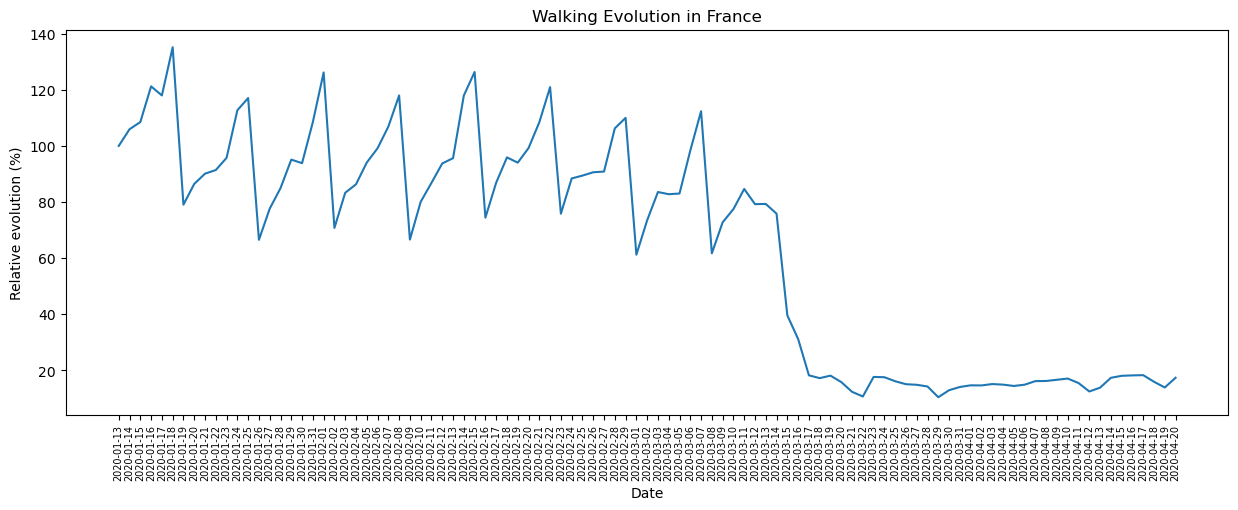

In [7]:
#Exemple : plot walking evolution in France

import matplotlib.pyplot as plt

#Extract walking data for France
france_walking = df_apple_mobility[(df_apple_mobility['region']=='France') & (df_apple_mobility['transportation_type']=='walking')]
france_walking.drop(['geo_type', 'region', 'transportation_type'], inplace=True, axis=1)

#Transpose it to have a pandas series and plot it
france_walking = france_walking.transpose()
fig = plt.figure(figsize=(15, 5))
plt.plot(france_walking)
plt.xticks(fontsize=7, rotation=90)
plt.title('Walking Evolution in France')
plt.xlabel('Date')
plt.ylabel('Relative evolution (%)')
plt.show()

### Google mobility report

In [8]:
#Overview of the dataset

df_google_mobility.head(3)

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0


In [9]:
#Countries for which we have data
google_countries = df_google_mobility['country_region'].unique()
print ('Data for', google_countries.size, 'countries :')
print (google_countries)

Data for 135 countries :
['United Arab Emirates' 'Afghanistan' 'Antigua and Barbuda' 'Angola'
 'Argentina' 'Austria' 'Australia' 'Aruba' 'Bosnia and Herzegovina'
 'Barbados' 'Bangladesh' 'Belgium' 'Burkina Faso' 'Bulgaria' 'Bahrain'
 'Benin' 'Bolivia' 'Brazil' 'The Bahamas' 'Botswana' 'Belarus' 'Belize'
 'Canada' 'Switzerland' "Côte d'Ivoire" 'Chile' 'Cameroon' 'Colombia'
 'Costa Rica' 'Cape Verde' 'Czechia' 'Germany' 'Denmark'
 'Dominican Republic' 'Ecuador' 'Estonia' 'Egypt' 'Spain' 'Finland' 'Fiji'
 'France' 'Gabon' 'United Kingdom' 'Georgia' 'Ghana' 'Greece' 'Guatemala'
 'Guinea-Bissau' 'Hong Kong' 'Honduras' 'Croatia' 'Haiti' 'Hungary'
 'Indonesia' 'Ireland' 'Israel' 'India' 'Iraq' 'Italy' 'Jamaica' 'Jordan'
 'Japan' 'Kenya' 'Kyrgyzstan' 'Cambodia' 'South Korea' 'Kuwait'
 'Kazakhstan' 'Laos' 'Lebanon' 'Liechtenstein' 'Sri Lanka' 'Lithuania'
 'Luxembourg' 'Latvia' 'Libya' 'Morocco' 'Moldova' 'North Macedonia'
 'Mali' 'Myanmar (Burma)' 'Mongolia' 'Malta' 'Mauritius' 'Mexico'
 'Malay

In [10]:
#The data can be at a more specific scale than the whole country
#For instance in France, the different regions are considered

google_mob_france = df_google_mobility[df_google_mobility['country_region'] == 'France']
print ('Regions considered in France')
print (google_mob_france['sub_region_1'].unique(), '\n')

#Let's now focus on Occitanie
print ('Subregions in Occitanie :')
google_mob_occ = google_mob_france[google_mob_france['sub_region_1'] == 'Occitanie']
print (google_mob_occ['sub_region_2'].unique())

#In occitanie let's focus on Haute-Garonne
google_mob_hg = google_mob_occ[google_mob_france['sub_region_2'] == 'Haute-Garonne']

Regions considered in France
[nan 'Auvergne-Rhône-Alpes' 'Bourgogne-Franche-Comté' 'Brittany'
 'Centre-Val de Loire' 'Corsica' 'Grand Est' 'Hauts-de-France'
 'Île-de-France' 'Normandy' 'Nouvelle-Aquitaine' 'Occitanie'
 'Pays de la Loire' "Provence-Alpes-Côte d'Azur"] 

Subregions in Occitanie :
[nan 'Ariege' 'Aude' 'Aveyron' 'Gard' 'Gers' 'Haute-Garonne'
 'Hautes-Pyrénées' 'Hérault' 'Lot' 'Lozère' 'Pyrénées-Orientales' 'Tarn'
 'Tarn-et-Garonne']


C:\Users\meria\AppData\Local\Temp\ipykernel_13188\1814930784.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  google_mob_hg = google_mob_occ[google_mob_france['sub_region_2'] == 'Haute-Garonne']


In [11]:
#Now let's see what data can be extracted in Haute-Garonne
print ('Columns of the dataframe :')
print (google_mob_hg.columns, '\n')

#Focus on the date
print ('Date range : ')
print ('from', google_mob_hg['date'].iloc[0], 'to', google_mob_hg['date'].iloc[-1], '\n')

#Specific places for which we have data
print ('Types of places considered :')
for col in google_mob_hg.columns :
    if '_percent_change_from_baseline' in col :
        print(' -',col.replace('_percent_change_from_baseline', ''))


Columns of the dataframe :
Index(['country_region_code', 'country_region', 'sub_region_1', 'sub_region_2',
       'metro_area', 'iso_3166_2_code', 'census_fips_code', 'date',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline'],
      dtype='object') 

Date range : 
from 2020-02-15 to 2020-08-25 

Types of places considered :
 - retail_and_recreation
 - grocery_and_pharmacy
 - parks
 - transit_stations
 - workplaces
 - residential


### Analysis of the dataframe topics_linked

In [12]:
#print the shape and head of the dataframe

print ('Shape of the dataframe :', df_topics_linked.shape)
df_topics_linked.head()

Shape of the dataframe : (4306126, 66)


,index,Geography.Regions.Asia.Central Asia,Geography.Regions.Europe.Eastern Europe,History and Society.Military and warfare,Culture.Media.Television,History and Society.Education,Culture.Media.Books,Geography.Regions.Africa.Africa*,Culture.Visual arts.Architecture,Culture.Biography.Women,...,Geography.Regions.Asia.West Asia,STEM.Chemistry,Geography.Regions.Europe.Northern Europe,Culture.Media.Video games,Geography.Regions.Asia.Southeast Asia,Culture.Media.Entertainment,Culture.Media.Music,Geography.Regions.Asia.Asia*,Geography.Regions.Asia.North Asia,qid
0,Rosmalen,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Q2001490
1,Commelinales,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Q290349
2,Transport_in_Honduras,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Q1130638
3,QuakeC,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Q2122062
4,Food_writing,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Q5465542


In [13]:
#Print the Wikipedia pages related to a specific topic

#Example for east Asia
topic = 'Geography.Regions.Asia.East Asia'
df_specific_topic = df_topics_linked[df_topics_linked[topic]==True]
print ('The', df_specific_topic.shape[0], 'Wikipedia pages related to', topic, 'are : \n')
print (df_specific_topic['index'])

The 148028 Wikipedia pages related to Geography.Regions.Asia.East Asia are : 

14                        Emperor_Kōtoku
41                                Datsun
58                  Chinese_food_therapy
86          Taiwan_independence_movement
104                   Ashikaga_Yoshiharu
                       ...              
4306064                         Fire_EX.
4306108                        Wu_Weihua
4306110    Seigan-ji_(Atsuta-ku,_Nagoya)
4306114          Kinoshita_Meister_Tokyo
4306125                         Qiao_Jie
Name: index, Length: 148028, dtype: object


### Analysis of the dictionary json_timeseries

In [14]:
# The coronawiki time series data are contained in the dictionary json_timeseries, let's see what is the structure of this dictionary
versions = list(json_timeseries.keys())
versions.sort()

print('The different versions of Wikipedia that are considered are:')
print(versions)

print('We have the visit history on '+str(int(len(versions)/2))+' different versions of Wikipedia, for each of these versions there are two keys one for the normal version and one for the mobile version .m ')

The different versions of Wikipedia that are considered are:
['ca', 'ca.m', 'da', 'da.m', 'de', 'de.m', 'en', 'en.m', 'fi', 'fi.m', 'fr', 'fr.m', 'it', 'it.m', 'ja', 'ja.m', 'ko', 'ko.m', 'nl', 'nl.m', 'no', 'no.m', 'sr', 'sr.m', 'sv', 'sv.m', 'tr', 'tr.m']
We have the visit history on 14 different versions of Wikipedia, for each of these versions there are two keys one for the normal version and one for the mobile version .m 


In [15]:
# Now let's see what is the structure inside one of these version, the german one for example
german = json_timeseries['de']
print('The keys for the german version, and for all other versions are:')
print(list(german.keys()))

The keys for the german version, and for all other versions are:
['len', 'sum', 'covid', 'topics']


In [16]:
# The key len gives the number of Wikipedia pages for this version
print('key len: The german version of Wikipedia contains '+str(int(german['len']))+' pages \n')

key len: The german version of Wikipedia contains 2415136 pages 



In [17]:
# The key sum gives the number of daily visits to all pages between 01-01-2018 and 07-31-2020
total_visits = german['sum']
print('key sum: The daily number of visits for these pages during the ten first days of 2018 are:')
print(list(total_visits.values())[:10])
print('\n')

key sum: The daily number of visits for these pages during the ten first days of 2018 are:
[9287425, 14474378, 15758306, 15069599, 13997127, 11238963, 13349559, 16927810, 16511909, 16352163]




In [52]:
# Now let's see what is inside the key covid
covid_visits = german['covid']
print('The key covid contains 3 sub-keys: ')
print(list(covid_visits.keys()))
# First, the number of pages that are considered to be linked with COVID-19 is in the key len
print('key len: ' + str(covid_visits['len'])+' pages are linked with COVID-19')
# Then, the key sum gives the number of daily visits to pages linked with COVID-19 between 01-01-2018 and 07-31-2020
print('key sum: The daily number of visits for COVID-19 related pages during the ten first days of 2018 are:')
print(list(covid_visits['sum'].values())[:10])
# Finally, the key percent gives the proportion of COVID-related visits to total visits
print('key percent: The proportion of COVID-related visits to total visits during the ten first days of 2018 are:')
print(list(covid_visits['percent'].values())[:10])
print('\n')

The key covid contains 3 sub-keys: 
['len', 'sum', 'percent']
key len: 77 pages are linked with COVID-19
key sum: The daily number of visits for COVID-19 related pages during the ten first days of 2018 are:
[160, 209, 219, 216, 334, 136, 238, 325, 351, 330]
key percent: The proportion of COVID-related visits to total visits during the ten first days of 2018 are:
[1.7227595377620814e-05, 1.4439307858341132e-05, 1.3897432883966082e-05, 1.4333493545515046e-05, 2.3862039688573235e-05, 1.2100760541697663e-05, 1.7828304290800916e-05, 1.9199175794151754e-05, 2.1257384594355505e-05, 2.0180816446117863e-05]




In [53]:
# Finally the key topics contains a sub-key for each topic that are detailed in the dataframe df_topics_linked.
print('key topics: '+str(len(german['topics'].keys())) + ' topics are considered in this version')
# Inside one of these topics the structure is the same as in the key covid:
print('Structure of a topic: ') 
print(list(german['topics']['Culture.Biography.Biography*'].keys()))
print('\n')
# First, the number of pages that are considered to be linked with this topic is in the key len
print('key len: ' + str(german['topics']['Culture.Biography.Biography*']['len'])+' pages are linked with biography \n')
# Then, the key sum gives the number of daily visits to pages linked with this topic between 01-01-2018 and 07-31-2020
print('key sum: The daily number of visits for pages related to biography during the ten first days of 2018 are:')
print(list(german['topics']['Culture.Biography.Biography*']['sum'].values())[:10])
print('\n')
# Finally, the key percent gives the proportion of visits related to this topic to total visits
print('key percent: The proportion of visits related to biography to total visits during the ten first days of 2018 are:')
print(list(german['topics']['Culture.Biography.Biography*']['percent'].values())[:10])

key topics: 64 topics are considered in this version
Structure of a topic: 
['len', 'sum', 'percent']


key len: 366688 pages are linked with biography 

key sum: The daily number of visits for pages related to biography during the ten first days of 2018 are:
[2205007, 2925728, 3098499, 2800005, 2682927, 2311069, 2803648, 3181377, 2921518, 2848499]


key percent: The proportion of visits related to biography to total visits during the ten first days of 2018 are:
[0.10350817913871328, 0.09235827140634287, 0.08880387037685927, 0.08467724704963073, 0.08678636048761482, 0.09125922639363901, 0.09235812518192289, 0.08462585718747359, 0.08100617057201899, 0.0796176462170131]


The structure of the dictionary json_timeseries can be shown with the following graph:

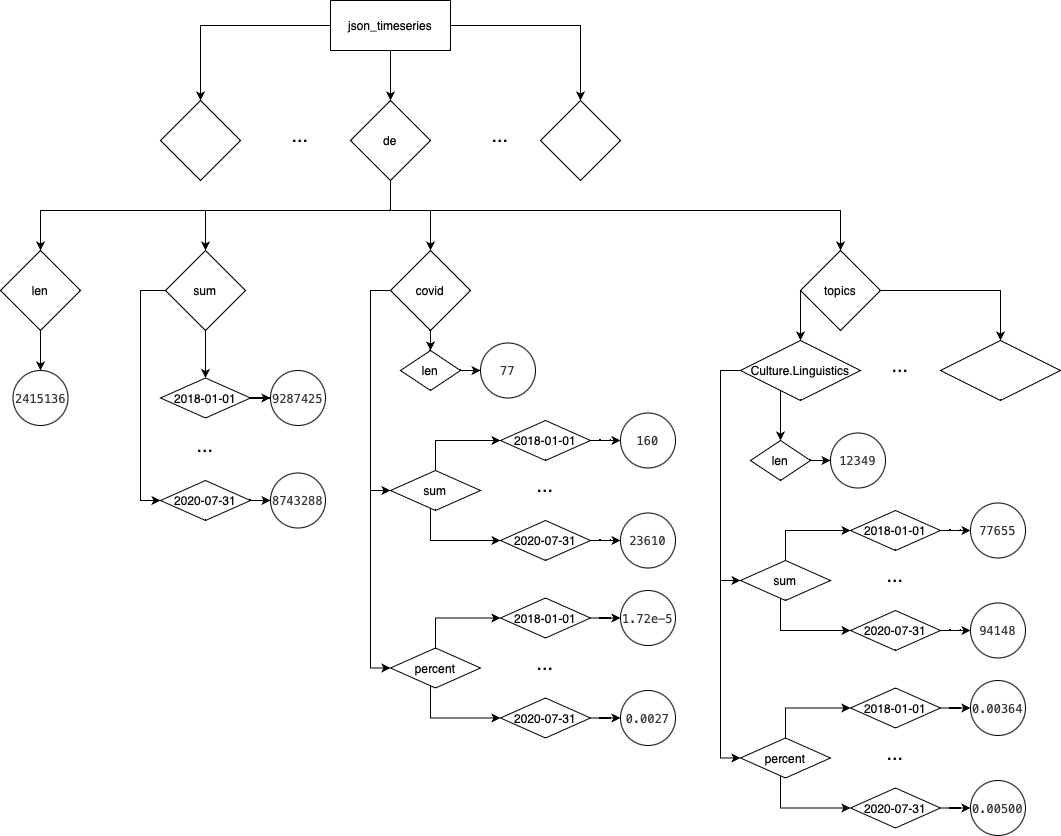

In [54]:
from IPython.display import Image
Image("json.png")

# First analysis of the evolution of interests

<BarContainer object of 64 artists>

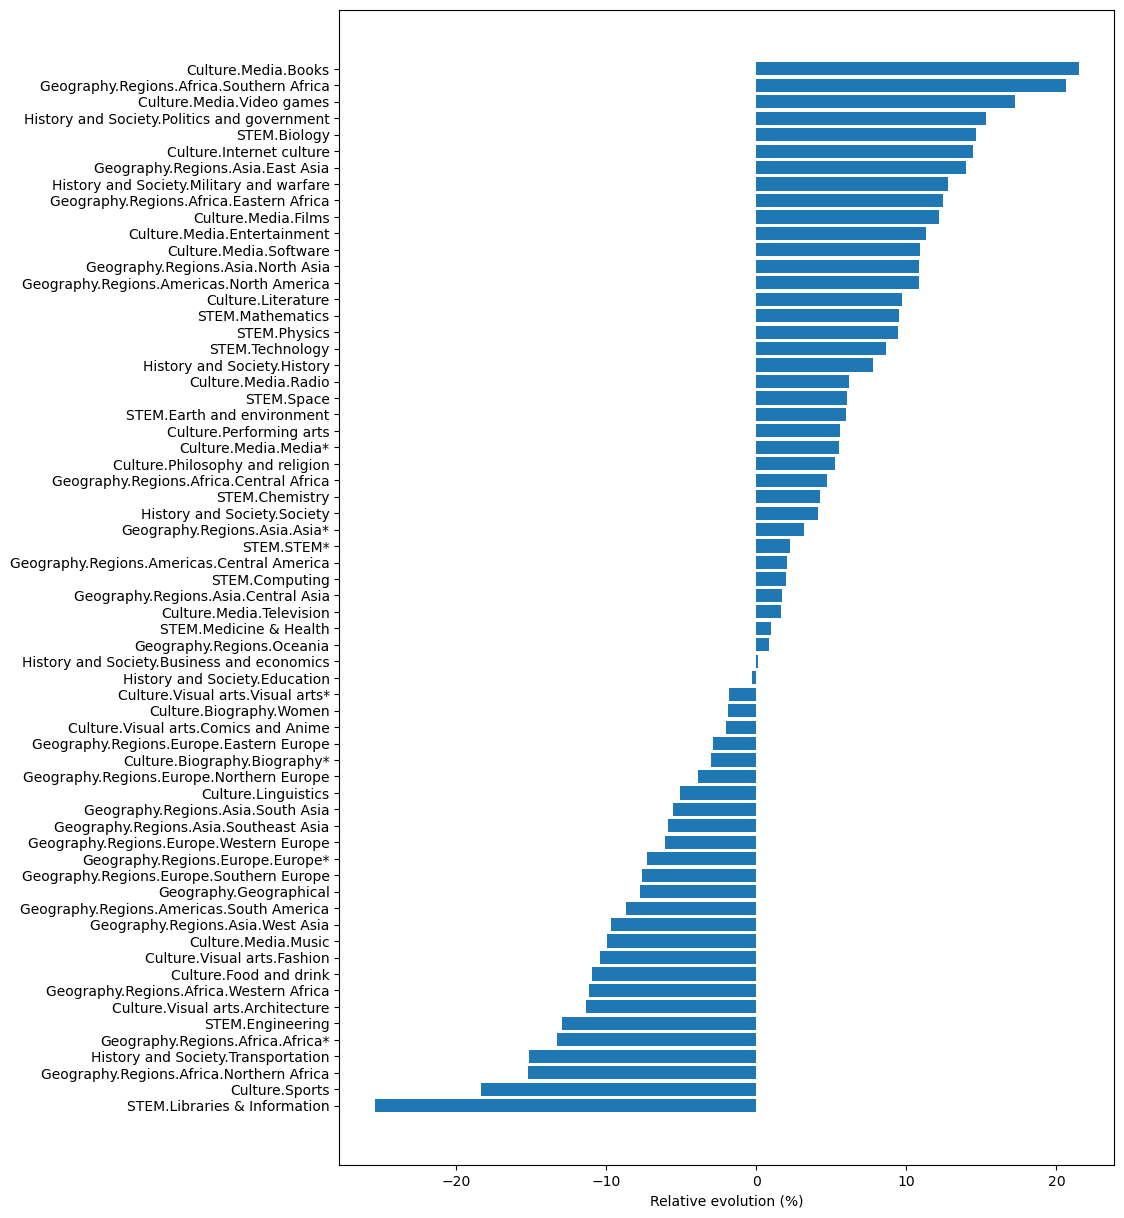

In [55]:
#Here we want to plot how each topic evolved during the pandemics with respect to the normal

# Let's put in the list time the list of the days of the considered period
time = list(json_timeseries['it']['topics']['Culture.Sports']['sum'].keys())
# We just remove the hours
time = [t[:10] for t in time]

# Thanks to the dataframe df_interventions we can get the dates of the lockdown in Italy
lockdown_start = df_interventions.loc[df_interventions['lang'] == 'it']['Lockdown'].to_list()
lockdown_end = df_interventions.loc[df_interventions['lang'] == 'it']['Normalcy'].to_list()

# We compute the index of these dates in the list of the days
start_index = time.index(lockdown_start[0])
end_index = time.index(lockdown_end[0])

#Create an empty dataframe which will contain the relative evolution for each topic
df = pd.DataFrame({'topic' : [], 'evolution' : []})

#For each topic, compute its evolution and add it to the dataframe
for topic in json_timeseries['it']['topics'].keys() :
    topic_m = pd.Series(list(json_timeseries['it.m']['topics'][topic]['percent'].values()))
    topic_normal = pd.Series(list(json_timeseries['it']['topics'][topic]['percent'].values()))
    topic_all = topic_normal.add(topic_m)

    #Relative evolution : ratio between the relative topic interset during the pandemic vs before pandemic
    relative_evolution = topic_all[start_index:end_index].mean() / topic_all.mean()

    #Select only the topics where the evolution is strong
    threshold=0.0 #can be increased if you want only the topics which have change above the threshold
    if relative_evolution > 1+threshold or relative_evolution < 1-threshold:
        new_entry = [topic, (relative_evolution-1)*100]
        df.loc[df.shape[0]] = new_entry 

#Sort and plot the dataframe
df.sort_values(by=['evolution'], inplace=True)
plt.figure(figsize=(10, 15))
plt.xlabel('Relative evolution (%)')
plt.barh(df['topic'], df['evolution'])

On this plot, the observed trend seems to be that italians' interest during lockdown decreased overall for things that were forbidden (travelling and doing sports), and increased overall for things that were allowed (watching films and reading books). The Italians thus seem to have conformed to lockdown rather than to be interested in what was no longer accessible.
Nevertheless, there are some exceptions like the categories Southern and North Africa that have increased, or the category Music that has decreased.

To develop this work we should do the same kind of analysis for different countries, especially in countries where the lockdown conditions were different.


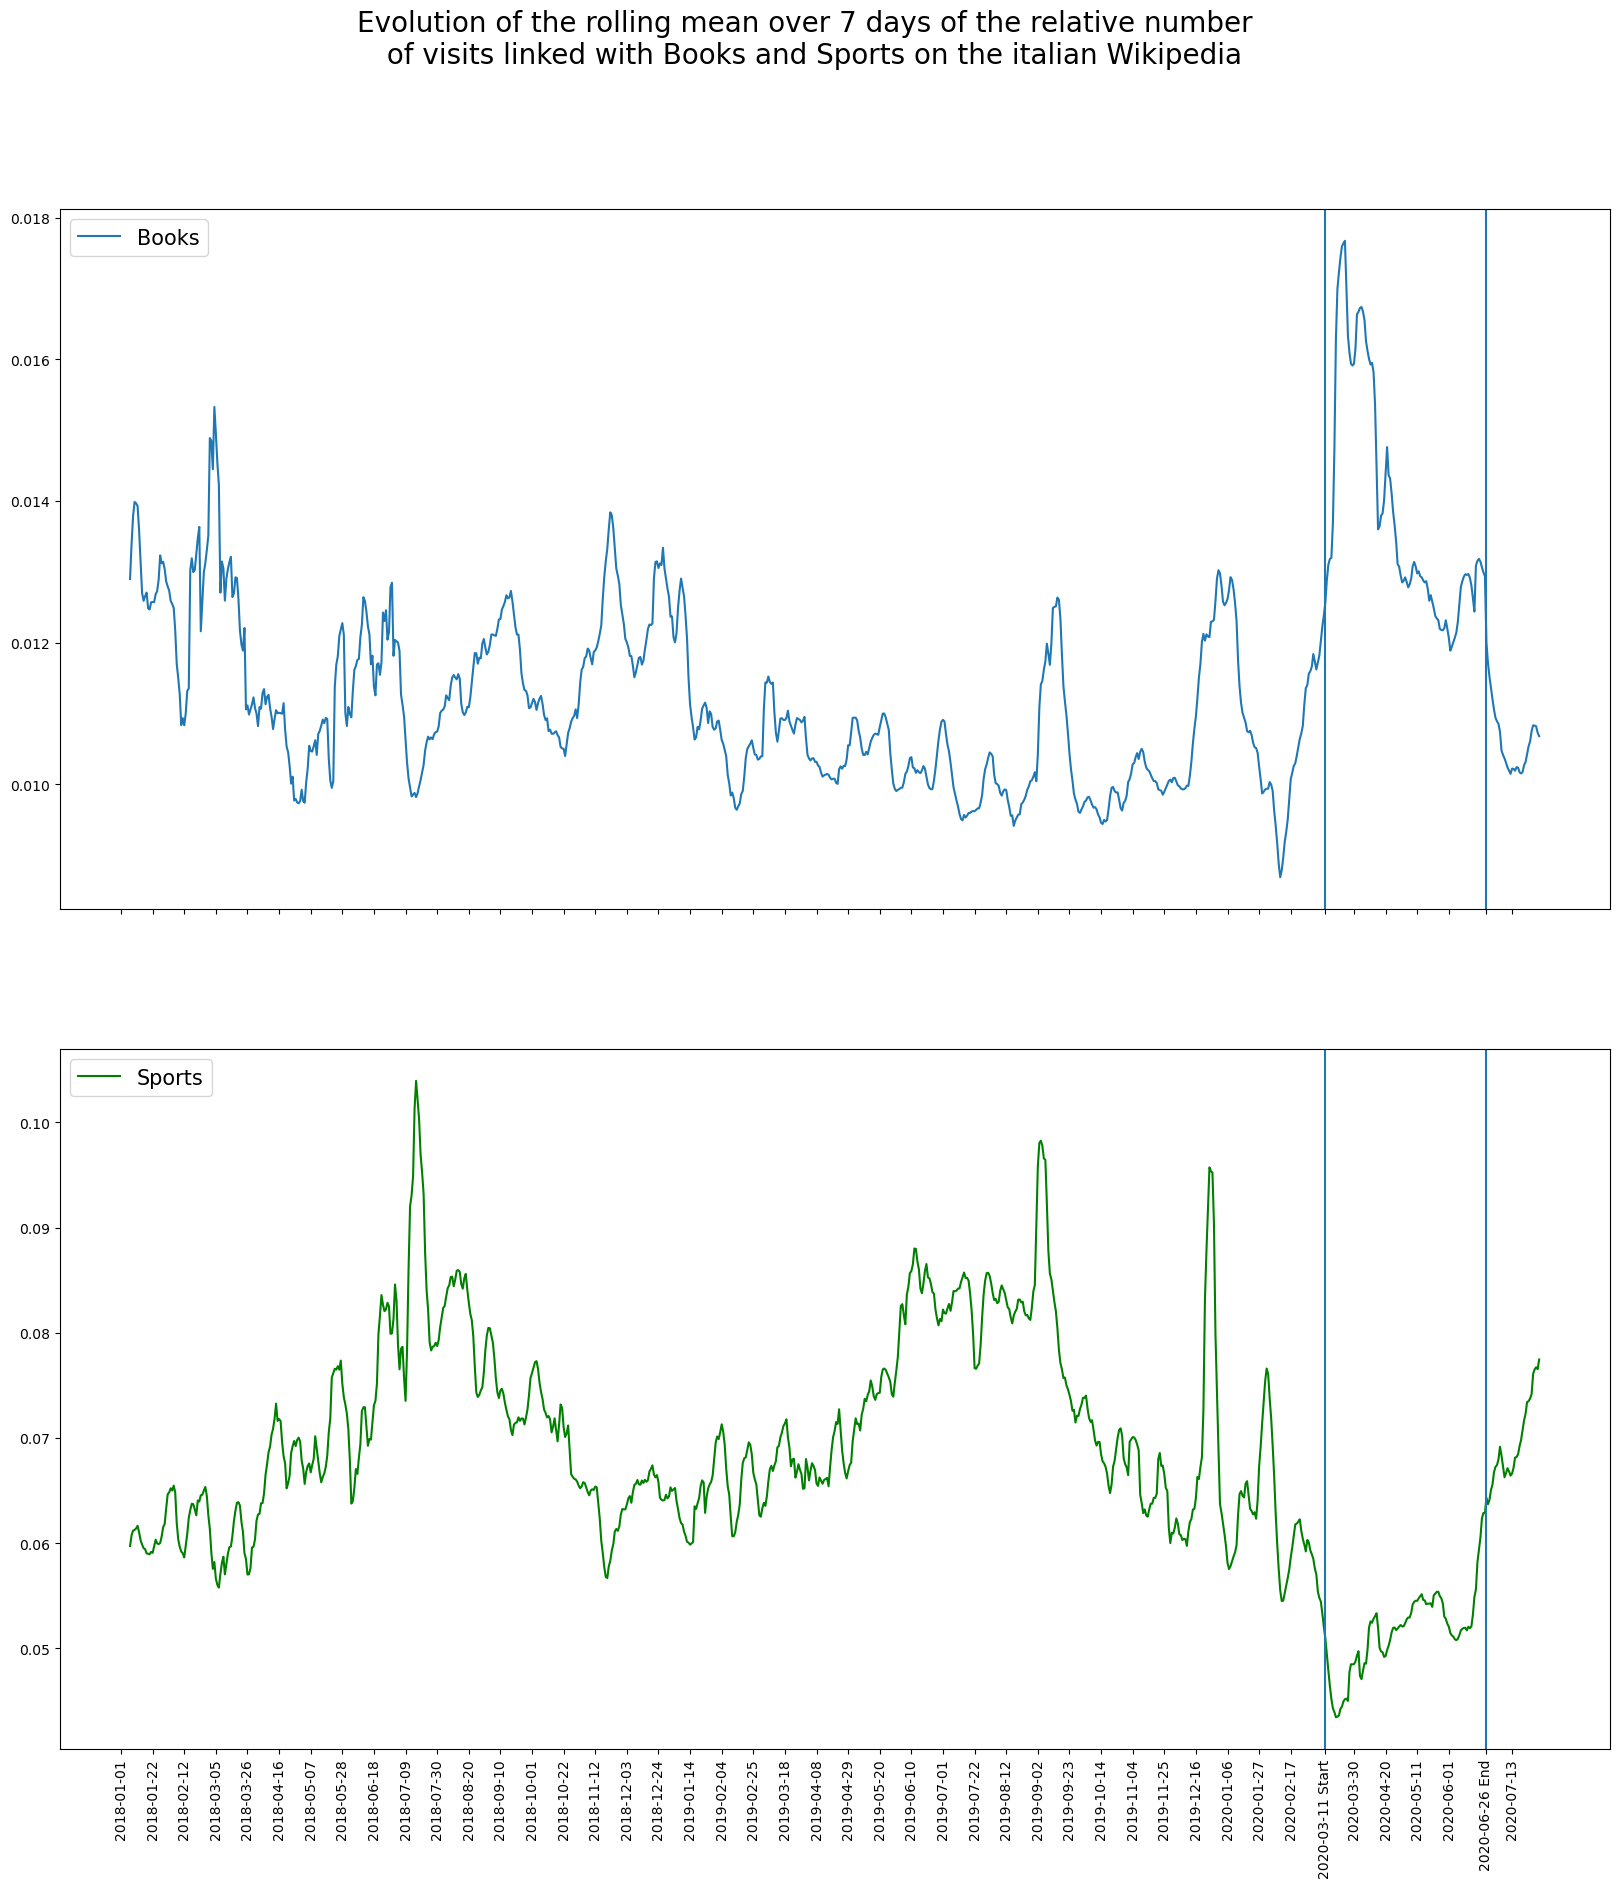

In [56]:
# Let's plot the evolution of the relative number of visits for two topics that have a large variation: Sports and Books

# For books and sports we create a list with the daily relative number of visits on the italian version linked to these topics
books = pd.Series(list(json_timeseries['it']['topics']['Culture.Media.Books']['percent'].values()))
sport = pd.Series(list(json_timeseries['it']['topics']['Culture.Sports']['percent'].values()))

# We do the same on the mobile version of the italian Wikipedia
books_m = pd.Series(list(json_timeseries['it.m']['topics']['Culture.Media.Books']['percent'].values()))
sport_m = pd.Series(list(json_timeseries['it']['topics']['Culture.Sports']['percent'].values()))

# For these two topics we add the values for the mobile and classic version
books_tot = books.add(books_m)
sport_tot = sport.add(sport_m)

# For the purpose of plotting our results we create a list of days with only 1 day in 21 and we also create a list of index for these days
time_reduced = [time[21*i] for i in range(int(len(time)/21)+1)]
time_pos = [21*i for i in range(int(len(time)/21)+1)]

# We add to the reduced list of days and the list of their index the dates of lockdowns in Italy
time_pos.append(start_index)
time_reduced.append(lockdown_start[0]+' Start')

time_pos.append(end_index)
time_reduced.append(lockdown_end[0]+' End')

# We also remove two points which are too close from the start/end of the lockdown to have a nice plot
time_pos.pop(time_reduced.index('2020-03-09'))
time_reduced.pop(time_reduced.index('2020-03-09'))

time_pos.pop(time_reduced.index('2020-06-22'))
time_reduced.pop(time_reduced.index('2020-06-22'))

fig, [ax1,ax2] = plt.subplots(2,1,figsize=(20,20),sharex=True)
ax1.plot(books_tot.rolling(7).mean(),label='Books')
ax2.plot(sport_tot.rolling(7).mean(),color='green',label='Sports')
ax2.set_xticks(time_pos,time_reduced,fontsize=10)
ax2.tick_params('x',labelrotation=90)
ax1.axvline(x=start_index)
ax1.axvline(x=end_index)
ax2.axvline(x=start_index)
ax2.axvline(x=end_index)
fig.suptitle('Evolution of the rolling mean over 7 days of the relative number \n of visits linked with Books and Sports on the italian Wikipedia',fontsize=20)

ax1.legend(fontsize=15)
ax2.legend(fontsize=15)

These two graphs confirm the previous results and give a better view of the overall evolution of interest in sport and books in Italy. Interest in books peaks (over the period considered) about a week after the start of the lockdown and remains higher overall during the lockdown than over the rest of the period. It is also clearly visible that this interest starts to decrease after several weeks of lockdown and eventually drops when the situation returns to normal. 

On the contrary, interest in sport reaches its lowest level about a week after lockdown, increases slowly over the weeks and then very quickly when returning to normal.